In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from fbprophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
df = pd.read_csv('/kaggle/input/wind-track/data.csv',

                   index_col=[0],
                  parse_dates=[0])
df.head(20)

,MW
dt,
2011-01-01 00:00:00,3416.0
2011-01-01 00:15:00,4755.0
2011-01-01 00:30:00,4939.0
2011-01-01 00:45:00,4939.0
2011-01-01 01:00:00,4998.0
2011-01-01 01:15:00,5184.0
2011-01-01 01:30:00,5341.0
2011-01-01 01:45:00,5438.0
2011-01-01 02:00:00,5509.0


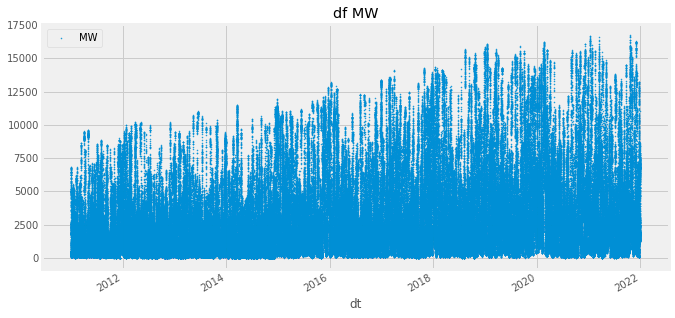

In [3]:
color_pal = sns.color_palette()
df.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[0],
          title='df MW')
plt.show()

# Time Series Features

In [4]:
print(df.info())
print(df.columns)

df['DF_MW'] = 0
df['DF_MW'].fillna(0, inplace=True)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 385566 entries, 2011-01-01 00:00:00 to 2021-12-30 07:45:00
Data columns (total 1 columns):
MW    385566 non-null float64
dtypes: float64(1)
memory usage: 15.9 MB
None
Index(['MW'], dtype='object')


# Train / Test Split

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)



In [6]:
df.head()

,MW,DF_MW
dt,,
2011-01-01 00:00:00,3416.0,0
2011-01-01 00:15:00,4755.0,0
2011-01-01 00:30:00,4939.0,0
2011-01-01 00:45:00,4939.0,0
2011-01-01 01:00:00,4998.0,0


In [7]:
# Format data for prophet model using ds and y
df_train_prophet = df_train.reset_index() \
    .rename(columns={'dt':'ds',
                     'MW':'y'})

In [8]:
df_train_prophet.head()

,ds,y,DF_MW
0,2020-03-04 02:30:00,11345.70,0
1,2017-07-22 05:45:00,2520.24,0
2,2015-03-20 20:00:00,666.00,0
3,2019-03-05 05:30:00,5808.39,0
4,2020-12-08 19:15:00,2647.87,0


In [ ]:
%%time
model = Prophet()
model.fit(df_train_prophet)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(df_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

In [ ]:
fig = model.plot_components(df_test_fcst)
plt.show()

# Compare Forecast to Actuals

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df_test.index, df_test['PJME_MW'], color='r')
fig = model.plot(df_test_fcst, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_test.index, pjme_test['DF_MW'], color='r')
fig = model.plot(df_test_fcst, ax=ax)
ax.set_xbound(lower='01-01-2015',
              upper='02-01-2015')
ax.set_ylim(0, 60000)
plot = plt.suptitle('January 2015 Forecast vs Actuals')

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower='01-01-2015', upper='01-08-2015')
ax.set_ylim(0, 60000)
ax.set_title('First Week of January Forecast vs Actuals')
plt.show()

# The End